In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 600x300 with 0 Axes>

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CreditFraud/creditcard.csv')

In [ ]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [ ]:
data.drop(['Time'], axis=1, inplace=True)

In [ ]:
data.shape

(284807, 30)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(275663, 30)

In [ ]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# Decision Tree

In [ ]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_yhat = DT.predict(X_test)

In [ ]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_yhat )))

Accuracy score of the Decision Tree model is 0.9991729061466132


In [ ]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_yhat)))

F1 score of the Decision Tree model is 0.7574468085106382


In [ ]:
confusion_matrix(y_test, dt_yhat, labels = [0, 1])

array([[68770,    18],
       [   39,    89]])

# K-Nearest Neighbors

In [ ]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

In [ ]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.999288989494457


In [ ]:
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))

F1 score of the K-Nearest Neighbors model is 0.7949790794979079


# Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [ ]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9989552498694062


In [ ]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

F1 score of the Logistic Regression model is 0.6666666666666666


# Support Vector Machines

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [ ]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_yhat)))

Accuracy score of the Support Vector Machines model is 0.999318010331418


In [ ]:
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_yhat)))

F1 score of the Support Vector Machines model is 0.7813953488372093


# Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [ ]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9991583957281328


In [ ]:
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))

F1 score of the Random Forest model is 0.7339449541284404


# XGBoost

In [ ]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [ ]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.999506645771664


In [ ]:
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))

F1 score of the XGBoost model is 0.8495575221238937


# Data Exploration and Visualization

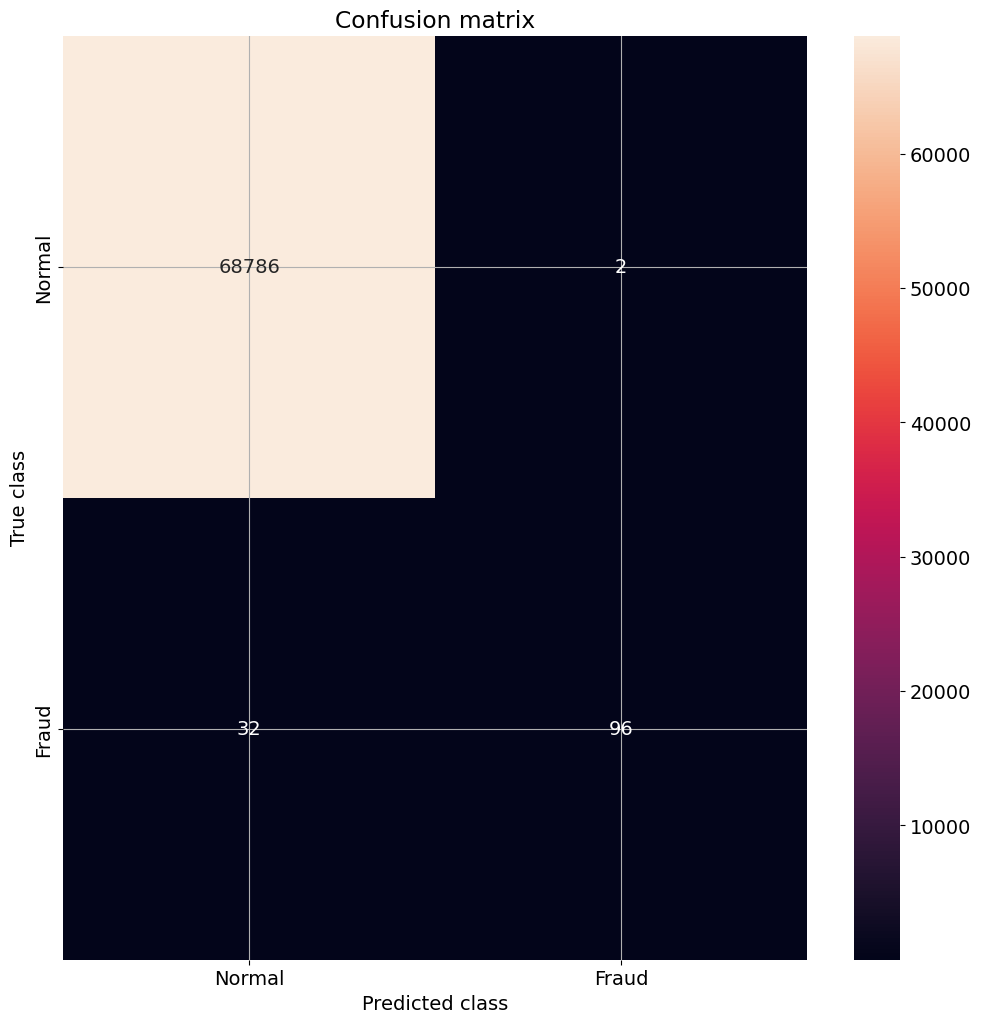

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, xgb_yhat)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


Fraudulent Cases: 473
Valid Transactions: 275190
Proportion of Fraudulent Cases: 0.0017158632097887638


<Axes: ylabel=' '>

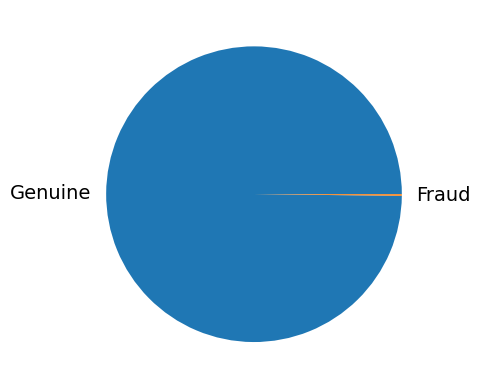

In [ ]:
print("Fraudulent Cases: " + str(len(data[data["Class"] == 1])))
print("Valid Transactions: " + str(len(data[data["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(data[data["Class"] == 1])/ data.shape[0]))

data_p = data.copy()
data_p[" "] = np.where(data_p["Class"] == 1 ,  "Fraud", "Genuine")

data_p[" "].value_counts().plot(kind="pie")